# Modelos Analíticos Parte II. ML No Supervisado

## PCA como compresor de la información

En esta clase vamos a explorar la aplicación de componentes principales para comprimir la información. La idea es que quizás no haga falta quedarse con todos los features sino que basta con las primeras componentes principales para reproducir aproximadamente un dado dataset, sobre todo si este ocupase mucho espacio en memoria.

### Carga de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importemos la clase que nos va a permitir realizar PCA, además del módulo para estandarizar nuestras variables, que suele ser una práctica habitual antes de aplicar PCA.

DOCUMENTACIÓN:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [2]:
# Clase para realizar componentes principales
from sklearn.decomposition import PCA

# Estandarizar (transforma las variables en z-scores)
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()  # Instanciamos el método

## Dataset de caras

Vamos a trabajar con el dataset de caras que ya viene precargado en scikit-learn:

In [4]:
from sklearn.datasets import fetch_olivetti_faces  # Cargamos el dataset de caras

data, targets = fetch_olivetti_faces(return_X_y=True)  # Cargamos las caras

print("Dimensión de los datos {}".format(data.shape))

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Andres\scikit_learn_data
Dimensión de los datos (400, 4096)


Ploteamos algunas caras:

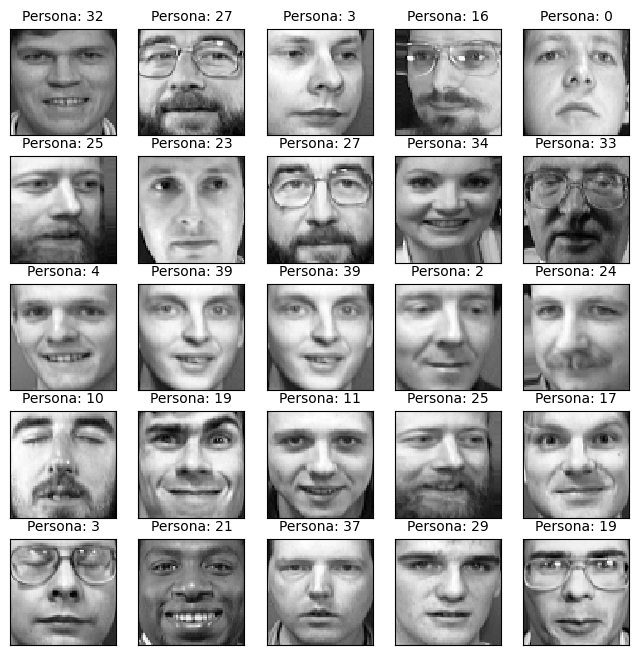

In [5]:
# Ploteamos 25 imagenes al azar:
fig = plt.figure(figsize=(8, 8))  # Seteamos el tamaño de la figura
for i in range(25):
    j = np.random.randint(
        0, data.shape[0]
    )  # En cada iteración elegimos un numero aleatorio entre 0 y la longitud de 'train_raw'
    plt.subplot(
        5, 5, i + 1
    )  # Obtenemos una matriz de 5x5 subplots y va complentadosé en la iteracion i-esima el subplot i+1
    plt.imshow(
        data[j, :].reshape(64, 64), interpolation="none", cmap="gray"
    )  # Ploteamos una imagen aleatoria, imagen j-esima del set de entrenamiento, en formato (28,28) para imagenes en escala de grises (eshapear)
    plt.title(
        "Persona: {}".format(targets[j]), fontsize=10
    )  # Colocamos titulo a los plots con el identificador unico de la persona
    plt.xticks([])  # Sacamos los ticks en el eje X
    plt.yticks([])  # Sacamos los ticks en el eje Y
plt.show()

### Visualización en el espacio bidimensional de las componentes principales

Cada una de las caras está descrito por un vector de $4096$ píxeles. Es decir, podemos pensar nuestro dataset como compuesto por $400$ instancias en un espacio de $4096$ features. Debido a que mucho de estos features pueden estar fuertemente correlacionados (pensar en píxeles adyacentes) podemos quizás encontrar combinación de los mismos que nos permita reducir el espacio en el cual viven nuestros datos.

Veamos qué pasa si esa reducción la hacemos en el espacio de las dos primeras componentes principales (pregunta, ¿hace falta estandarizar las variables en este problema?):

In [6]:
# Creación del modelo de PCA con 2 componentes:
pca = PCA(n_components=2)

# Ajuste y transformación de los datos:
pca.fit(data)
X_pca = pca.transform(data)

Veamos cómo se ubican cada uno de los datos en este espacio:

Text(0, 0.5, 'Segunda componente principal')

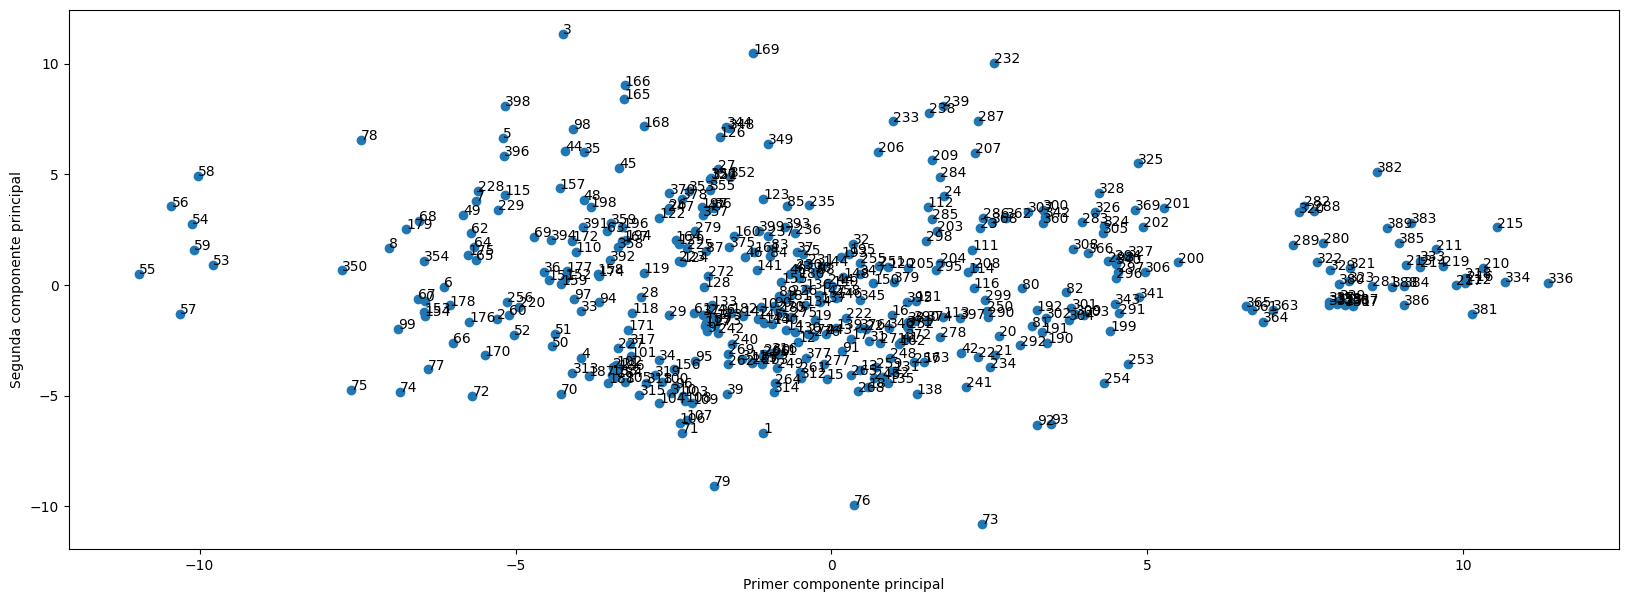

In [7]:
fig, ax = plt.subplots(figsize=(20, 7))

# Hacemos un scatter plot de cada uno de los datos:
ax.scatter(X_pca[:, 0], X_pca[:, 1])

# Por cada dato escribimos a qué instancia corresponde:
for i in range(data.shape[0]):
    ax.text(X_pca[i, 0], X_pca[i, 1], s=i)

ax.set_xlabel("Primer componente principal")
ax.set_ylabel("Segunda componente principal")

Seleccionemos algunos puntos que estén muy distantes entre si y veamos a qué caras corresponden:

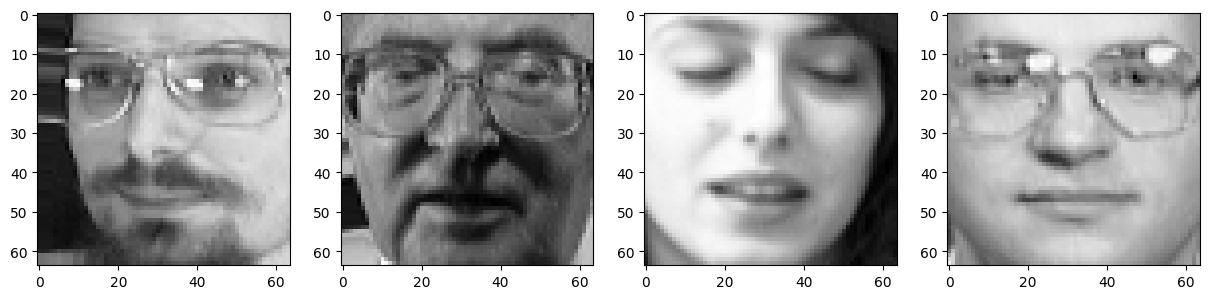

In [8]:
# Lista de índices de caras
face_ids = [169, 336, 76, 55]

fig, ax = plt.subplots(1, 4, figsize=(15, 5))  # seteo el tamano de la figura

ax[0].imshow(
    data[face_ids[0], :].reshape(64, 64), interpolation="none", cmap="gray"
)  # Ploteamos la imagen de índice face_ids[j], en formato (28,28) para imagenes en escala de grises (Reshapear)
ax[1].imshow(
    data[face_ids[1], :].reshape(64, 64), interpolation="none", cmap="gray"
)  # Ploteamos la imagen de índice face_ids[j], en formato (28,28) para imagenes en escala de grises (Reshapear)
ax[2].imshow(
    data[face_ids[2], :].reshape(64, 64), interpolation="none", cmap="gray"
)  # Ploteamos la imagen de índice face_ids[j], en formato (28,28) para imagenes en escala de grises (Reshapear)
ax[3].imshow(
    data[face_ids[3], :].reshape(64, 64), interpolation="none", cmap="gray"
)  # Ploteamos la imagen de índice face_ids[j], en formato (28,28) para imagenes en escala de grises (Reshapear)

Veamos ahora algunos puntos que estén muy cerca entre sí:

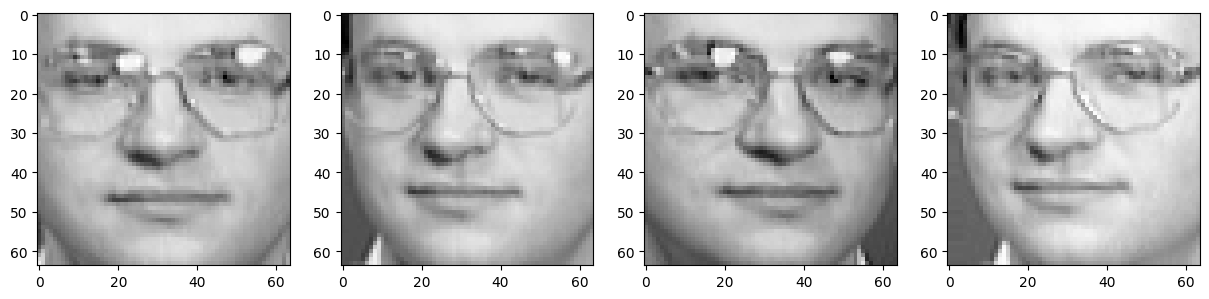

In [9]:
# Lista de índices de caras
facei_ds = [55, 56, 57, 58]

fig, ax = plt.subplots(1, 4, figsize=(15, 5))  # seteo el tamano de la figura

ax[0].imshow(
    data[facei_ds[0], :].reshape(64, 64), interpolation="none", cmap="gray"
)  # Ploteamos la imagen de índice facei_ds[j], en formato (28,28) para imagenes en escala de grises (Reshapear)
ax[1].imshow(
    data[facei_ds[1], :].reshape(64, 64), interpolation="none", cmap="gray"
)  # Ploteamos la imagen de índice facei_ds[j], en formato (28,28) para imagenes en escala de grises (Reshapear)
ax[2].imshow(
    data[facei_ds[2], :].reshape(64, 64), interpolation="none", cmap="gray"
)  # Ploteamos la imagen de índice facei_ds[j], en formato (28,28) para imagenes en escala de grises (Reshapear)
ax[3].imshow(
    data[facei_ds[3], :].reshape(64, 64), interpolation="none", cmap="gray"
)  # Ploteamos la imagen de índice facei_ds[j], en formato (28,28) para imagenes en escala de grises (Reshapear)

¿Qué concluímos con esto último? Reducir la dimensión con la que vienen nuestros datos de forma inteligente (como con componentes principales) acerca instancias que son parecidas entre si, acercándonos a nosotros a la idea de *clustering*.

### Fracción de varianza explicada

Elegimos empezar en forma arbitraria con un espacio bidimensional, pero ¿cuánta información estamos reteniendo en ese espacio? Exploremos cuánto aporta cada componente principal, yéndonos ahora hasta 100 componentes (manteniéndonos siempre en un zona donde la cantidad de componentes principales sea bastante más chica que la dimensión del espacio original):

In [10]:
# Creación del modelo de PCA con 100 componentes
pca = PCA(n_components=100)

# Ajuste y transformación de los datos
pca.fit(data)

PCA(n_components=100)

Grafiquemos la información que aporta cada componente y la información acumulada:

Text(0.5, 0, 'Cantidad de componentes principales')

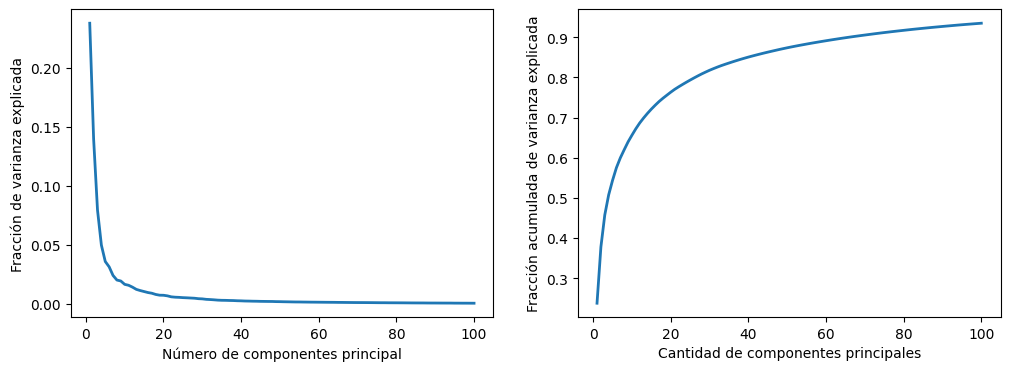

In [11]:
# con '.explained_variance_ratio_' vemos la fracción de información que aporta cada componente:
evr = pca.explained_variance_ratio_

# Graficamos la fracción de varianza que aporta cada componente y la información acumulada:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(range(1, len(evr) + 1), evr, "-", linewidth=2)
ax[0].set_ylabel("Fracción de varianza explicada")
ax[0].set_xlabel("Número de componentes principal")

# Calculamos el acumulado con la función cumsum de numpy:
varianza_acumulada = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), varianza_acumulada, "-", linewidth=2)
ax[1].set_ylabel("Fracción acumulada de varianza explicada")
ax[1].set_xlabel("Cantidad de componentes principales")

Notemos que a pesar que nuestros datos viven originalmente en un espacio de $4096$ features (píxeles) con solo 60 componentes principales alcanzamos alrededor del 90% de la información, lo cual implica una reducción dimensional bastante importante sin una pérdida tan significativa de la información.

### Visualización de las componentes principales

Veamos cómo se visualizan las primeras componentes en el espacio de features originales:

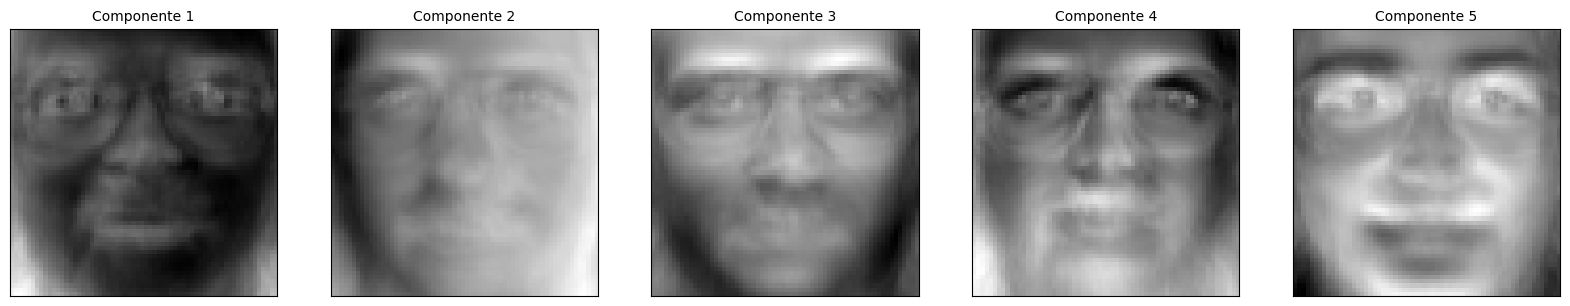

In [12]:
fig, ax = plt.subplots(1, 5, figsize=(20, 10))  # Seteamos el tamaño de la figura

# Hacemos un loop sobre las primeras 5 componentes:
for pc in range(5):
    # Ploteo de la cara reconstruida con el mismo código de antes:
    ax[pc].imshow(
        pca.components_[pc].reshape(64, 64), interpolation="none", cmap="gray"
    )  # plotea la image dada por pc-componente principal en formato (28,28) para imagenes en escala de grises (tengo que reshapear)

    ax[pc].set_title(
        "Componente {}".format(pc + 1), fontsize=10
    )  # Ponemos el título a los plots con el componente:

    ax[pc].set_xticks([])  # Sacamos los ticks en el eje X
    ax[pc].set_yticks([])  # Sacamos los ticks en el eje Y

plt.show()